In [32]:
[np.exp(-a) for a in range(10)]

[1.0,
 0.36787944117144233,
 0.1353352832366127,
 0.049787068367863944,
 0.018315638888734179,
 0.006737946999085467,
 0.0024787521766663585,
 0.00091188196555451624,
 0.00033546262790251185,
 0.00012340980408667956]

In [25]:
[(t,t**(-.5)) for t in range(1,10)]

[(1, 1.0),
 (2, 0.7071067811865476),
 (3, 0.5773502691896257),
 (4, 0.5),
 (5, 0.4472135954999579),
 (6, 0.408248290463863),
 (7, 0.37796447300922725),
 (8, 0.3535533905932738),
 (9, 0.3333333333333333)]

In [30]:
[(t,t**(-.5)*np.abs(np.cos(1/t))) for t in range(1,10)]

[(1, 0.54030230586813977),
 (2, 0.62054458056374562),
 (3, 0.54557114732742051),
 (4, 0.48445621085532237),
 (5, 0.43829909810572104),
 (6, 0.40259128843807357),
 (7, 0.37411424736224991),
 (8, 0.35079484938766603),
 (9, 0.33127783617963064)]

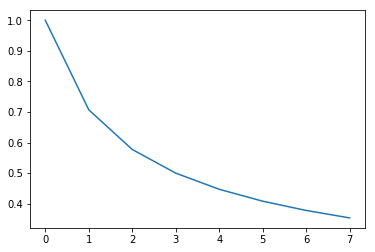

In [20]:
y = [i**(-.5) for i in range(1,9)]
plt.plot(y)

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import binom



Step 1:

We can generate uniform RV $\sim U[0,1]$ and use the value to pick the quadrant to sample some such that:
$$U_1 \leq .25 = Q1$$ $$.25 < U_1 \leq .5 = Q2$$ $$.5 < U_1 \leq .75 = Q3$$ $$.75 < U_1 \leq 1 = Q4$$

Step 2:

Using the first quadrant as an example, we solve for the area $\int_0^1 \frac{1}{x^{1/4}} = \frac{4}{3}x^{3/4} = \frac{4}{3}$

To sample a value from the quadrant, we solve:

$\frac{4}{3}U[0,1] = \frac{4}{3}x^{3/4}$

$x^{3/4} = U[0,1]$

$x = U[0,1]^{4/3}$

$F^{-1}(x) = y^{4/3}$

Step 3:

Depending on $U[0,1]$ from step 1, we can flip the signs of $(x,y)$ into the appropriate quadrant

First, we need to solve for k such that our joint pdf is a density:

$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}ke^{(-x^2 - y^2 \frac{cos(xy)x}{2}))} = 1$, k = .305

Then we can use acceptence rejection with $c = \sqrt{2\pi}$ such that our proposal density $N(0,1)N(0,1)$ is simplified to $e^{-x^2/2 - y^2/2}$

Step 1: Generate $U \sim Unif[0,1]$

Step 2: Generate normal RVs for our proposal - $g(x,y) = g(x)g(y) = N(0,1)N(0, 1)$

Step 3: While $U > f(x,y)/cg(x,y)$
        
        Generate U
        Generate X, Y


Step 4: Accept $X$, $Y$

In [222]:
from scipy.integrate import dblquad

In [243]:
def integrand(x,y):
    return np.exp(-x**2 - y**2 + (np.cos(x*y)*x)/2)

k = 1/dblquad(integrand,-np.inf,np.inf,-np.inf,np.inf)[0]
print('k: ',k)

k:  0.30512173640608914


In [293]:
def simulator(n):
    x_blop, y_blop = np.zeros(n), np.zeros(n)
    i = 0
    c = np.sqrt(2*np.pi)
    while i < n:
        u = uniform.rvs(size=1)
        x, y = np.random.normal(0,1), np.random.normal(0,1)
        f, g = k*integrand(x,y), np.exp(-x*x/2 - y*y/2)
        if u <= f/(c*g):
            x_blop[i] = x
            y_blop[i] = y
            i += 1
    plt.hist(x_blop, n, density=1, alpha=0.75)
    print('E[X]: ', np.mean(x_blop))

E[X]:  0.162952275544


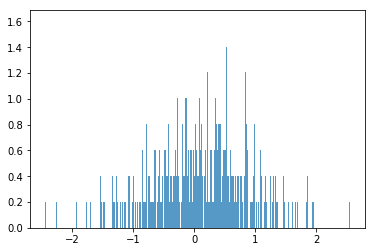

In [285]:
simulator(1000)

E[X]:  0.170007705897


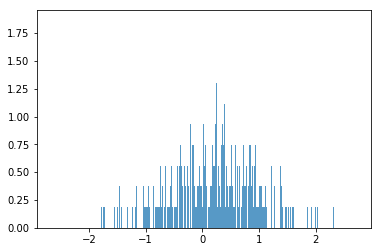

In [289]:
simulator(10000)

E[X]:  0.176832190966


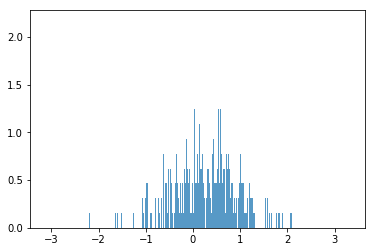

In [288]:
simulator(100000)


service time: $F(x) = 1 - e^{-5\sqrt{x}}$

so the inverse

$F^{-1}(x) = \frac{log(1-y)}{-5}^2$ used for sampling function


a) 

n = 10000;

x = 1;

while x <= n

    finish = 0;
    
    l = 0;
    
    i = 1;
    
    samples = sample_inh_sin_rate(5);
    
    j = length(samples);
    
    while i <= j
    
        r = rand(1);
        
        if i == 1
        
            finish(i) = ((log(1-r)/(-5)))^2 + samples(i);
            
        elseif samples(i) > finish(i-1)
        
            finish(i) = ((log(1-r)/(-5)))^2 + samples(i);
            
        else
        
            finish(i) = ((log(1-r)/(-5)))^2 + finish(i-1);
            
        end
        
        i = i + 1;
    end
    
    i = 1;
    
    while i <= j
    
        if samples(i) < 5 && finish(i) > 5
        
            l = l + 1;
            
        end
        
        i = i + 1;
        
    end

queue(x) = l;

x = x + 1;

end

round(mean(queue))

a)

ans =

    1

b)

i = 1;

n = 10000;

x = 1;

while x <= n

    l = 0;
    
    temp = 0;
    
    finish = 0;

    i = 1;

    samples = sample_inh_sin_rate(6);

    j = length(samples);

    while i <= j

        r = rand(1);

        if i == 1

            finish(i) = ((log(1-r)/(-5)))^2+samples(i);

            l(i) = 0;

        elseif samples(i) > finish(i-1)

            finish(i) = ((log(1-r)/(-5)))^2+samples(i);

            if l(i-1)>0

                l(i)= l(i-1) - 1;

            end

            if l(i-1) == 0

                l(i) = 0;

            end

        else

            finish(i) = ((log(1-r)/(-5)))^2+finish(i-1);

            l(i)= l(i-1)

            l(i)= l(i-1) + 1;

        end

        i = i + 1;

    end

queue(x) = max(l);

test(x) = queue(x) > 4;

x = x + 1;

finish = transpose(finish);

samples = transpose(samples);

round(mean(queue))

sum(test)/n

b)

average of maximum number of people in queue (not sure if these should be integers??)

ans =

    7

b)

probability of 5 or more customers in queue

ans =
    
    .56844

Earthquake arrivals are poisson arrivals that occur at a given rate per unit time / per unit of surface area. In this case, we can let unit time = day (arbitrarily), and unit of surface area = $2\pi$, for each hemisphere given that the surface area of planet IDEAL = $4\pi r = 4\$

Thus, northern hemisphere arrivals $X \sim Pois(1/\pi)$ and southern hemisphere arrivals $Y \sim Pois(1/2\pi)$

Using $T = 3$, we can simulate the earthquakes via a poisson splitting algorithm as such:

Step 1:  generate $N(T)\sim Pois(\lambda T)$ for northern hemisphere arrivals $X \sim Pois(1/\pi*3)$ and southern hemisphere arrivals $Y \sim Pois(1/2\pi*3)$

Step 2: for each arrival, we need to randomly sample a point on the sphere by generating a normally distributed random vector $v = [x,y,z]$ and making sure to normalize it $v/||v||$ so that it is uniformly distributed on the surface. We can ensure that our points fall on the northern and southern hemisphere by using a $\pm$ absolute value function on component $z$ of vector $v$

Step 3:  given $N(T) = n$ , generate $U_1,...,U[0,T]$

Step 4:  arrange $U(1)< U(2)...< U(k)$ and set $A_i = U(i)$

Step 5:  Output: $N(T), A(i)\ \forall \ i= 1,...,n$

In [181]:
def sample(t, intensity):
    Lambda = intensity
    # generate number of arrival
    N = np.random.poisson(Lambda * t)
    # generate time of arrival
    A_proposal = np.sort(t * np.random.uniform(0,1,N))
    # accept the proposal with lambda(t)/lambda
    A = np.empty((1,))
    for i in range(N):
        U = np.random.uniform()
        if U <= (A_proposal[i])/ Lambda:
            A = np.append(A, A_proposal[i])
    return sorted(A)

In [182]:
def north(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec[2] = np.abs(vec[2])
    vec /= np.linalg.norm(vec, axis=0)
    return vec

def south(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec[2] = -np.abs(vec[2])
    vec /= np.linalg.norm(vec, axis=0)
    return vec

time of arrival in northern hemisphere:  [1.6748264015278211, 1.9094316125149242, 3.0]
time of arrival in southern hemisphere:  [4.9406564584124654e-324]


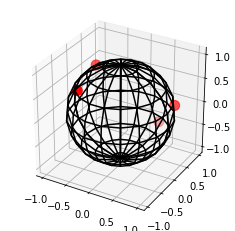

In [196]:
tn, ts = sample(3, 1/np.pi), sample(3, 1/(2*np.pi))
xn, yn, zn = north(len(tn))
xs, ys, zs = south(len(ts))

xi, yi, zi = np.append(xn,xs), np.append(yn,ys), np.append(zn,zs)
phi = np.linspace(0, np.pi, 10)
theta = np.linspace(0, 2 * np.pi, 20)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
ax.scatter(xi, yi, zi, s=100, c='r', zorder=10)

print('time of arrival in northern hemisphere: ', tn)
print('time of arrival in southern hemisphere: ', ts)

We know that the amount of times that we need to run acceptance rejection is actually a geometric RV such that: 

$p = P(U \leq \frac{1}{c} \frac{f(Y)}{g(Y)}) = P(N = n) = (1−p)^{n−1}p, \forall \ n \geq 1$

using the above in conjunction with the understanding that $U$ and $Y$ are independent, we can show that the conditional density $P(Y = y | U \leq \frac{f(Y)}{cg(Y)})$, or in english, our effective sampling from the distribution given that our uniform RV fits within the ratio, is indeed equal to our density $f(y)$...

$P(Y = y | U \leq \frac{f(Y)}{cg(Y)}) = cP(Y = y , U \leq \frac{f(Y)}{cg(Y)})$

$= cP(Y = y , U \leq \frac{f(y)}{cg(y)})$

$= cg(y) P(U \leq \frac{f(y)}{cg(y)})$

$= cg(y) \frac{f(y)}{cg(y)}$

$= f(y)$

$= P(X = k)$